##### Описание задачи
Неодходимо выполнить задачу классификации при помощи алгоритма k ближайших соседей.
##### Описание датасета
Данный датасет содержит информацию об играх на платформе AppStore.
Признаки, содеращиеся в датасете:
* Название игры
* Разработчик игры
* Возрастной рейтинг
* Размер игры
* Наличие внутриигровых покупок
* Языки
* Жанры
* Доступность игры на iPad/iPod/MacBook/Apple Watch/iPhone/Apple TV
* Средняя оценка
* Кол-во оценок

В качестве целевого признака я выбрал наличие внутриигровых покупок

In [1]:
import sklearn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

Чтение данных

In [2]:
url = "https://raw.githubusercontent.com/SHVlader/ML/main/DB/appstore_games_march_2021.csv"
data_raw = pd.read_csv(url)

In [3]:
data_raw

,Unnamed: 0,id,name_app,developer,age_rating,size,price,purchases,languages,category,...,watch,ipad,ipod,iphone,tv,mac,url,icon_url,rating_avg,rating_count
0,0,1221248388,Donut Abc Learning Animals And Letters GamвЂЄeвЂ¬,Anchalee Pradissook,4+,191.6 MB,Free,No,English,Games,...,0,1,1,1,0,0,https://apps.apple.com/us/app/donut-abc-learni...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,5.0,1
1,1,1302771128,AR CubeвЂЄsвЂ¬,Alkis Hadjinicolaou,4+,20 MB,$0.99,No,English,Games,...,0,0,1,1,0,0,https://apps.apple.com/us/app/ar-cubes/id13027...,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,0.0,0
2,2,1535473269,Zoo MemorieвЂЄsвЂ¬,Valerii Kot,4+,46.7 MB,Free,No,English,Games,...,0,1,1,1,0,0,https://apps.apple.com/us/app/zoo-memories/id1...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,0.0,0
3,3,1490641095,Kelsi Davies: Haunt EscapвЂЄeвЂ¬,Aaron Hibberd,12+,188 MB,Free,Yes,English,Games,...,0,1,1,1,0,0,https://apps.apple.com/us/app/kelsi-davies-hau...,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.9,116
4,4,1128166384,The Tower Blocks: Free Building Blocken Stack ...,Pruettanon Rattanalaoo,4+,7.6 MB,Free,No,English,Games,...,0,1,1,1,0,0,https://apps.apple.com/us/app/the-tower-blocks...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187902,187902,1524773733,Pipe ArвЂЄtвЂ¬,G BOSON ARGE YAZILIM BILISIM SANAYI TICARET LT...,4+,75.2 MB,Free,No,English,Games,...,0,1,1,1,0,0,https://apps.apple.com/us/app/pipe-art/id15247...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,0.0,0
187903,187903,523419442,Jigsaw Puzzles for little oneвЂЄsвЂ¬,Read,4+,253 MB,$0.99,Yes,English,Games,...,0,1,0,0,0,0,https://apps.apple.com/us/app/jigsaw-puzzles-f...,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,2.5,2
187904,187904,1059500471,Car Wash for KidвЂЄsвЂ¬,EDUJOY ENTERTAINMENT S.L.,4+,33.2 MB,Free,No,English,Games,...,0,1,1,1,0,1,https://apps.apple.com/us/app/car-wash-for-kid...,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,4
187905,187905,1261811518,Forbidden RacinвЂЄgвЂ¬,Vlad Engelgardt,4+,85.9 MB,Free,Yes,"English, French, German, Italian, Japanese, Ko...",Games,...,0,1,1,1,0,1,https://apps.apple.com/us/app/forbidden-racing...,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.9,137


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


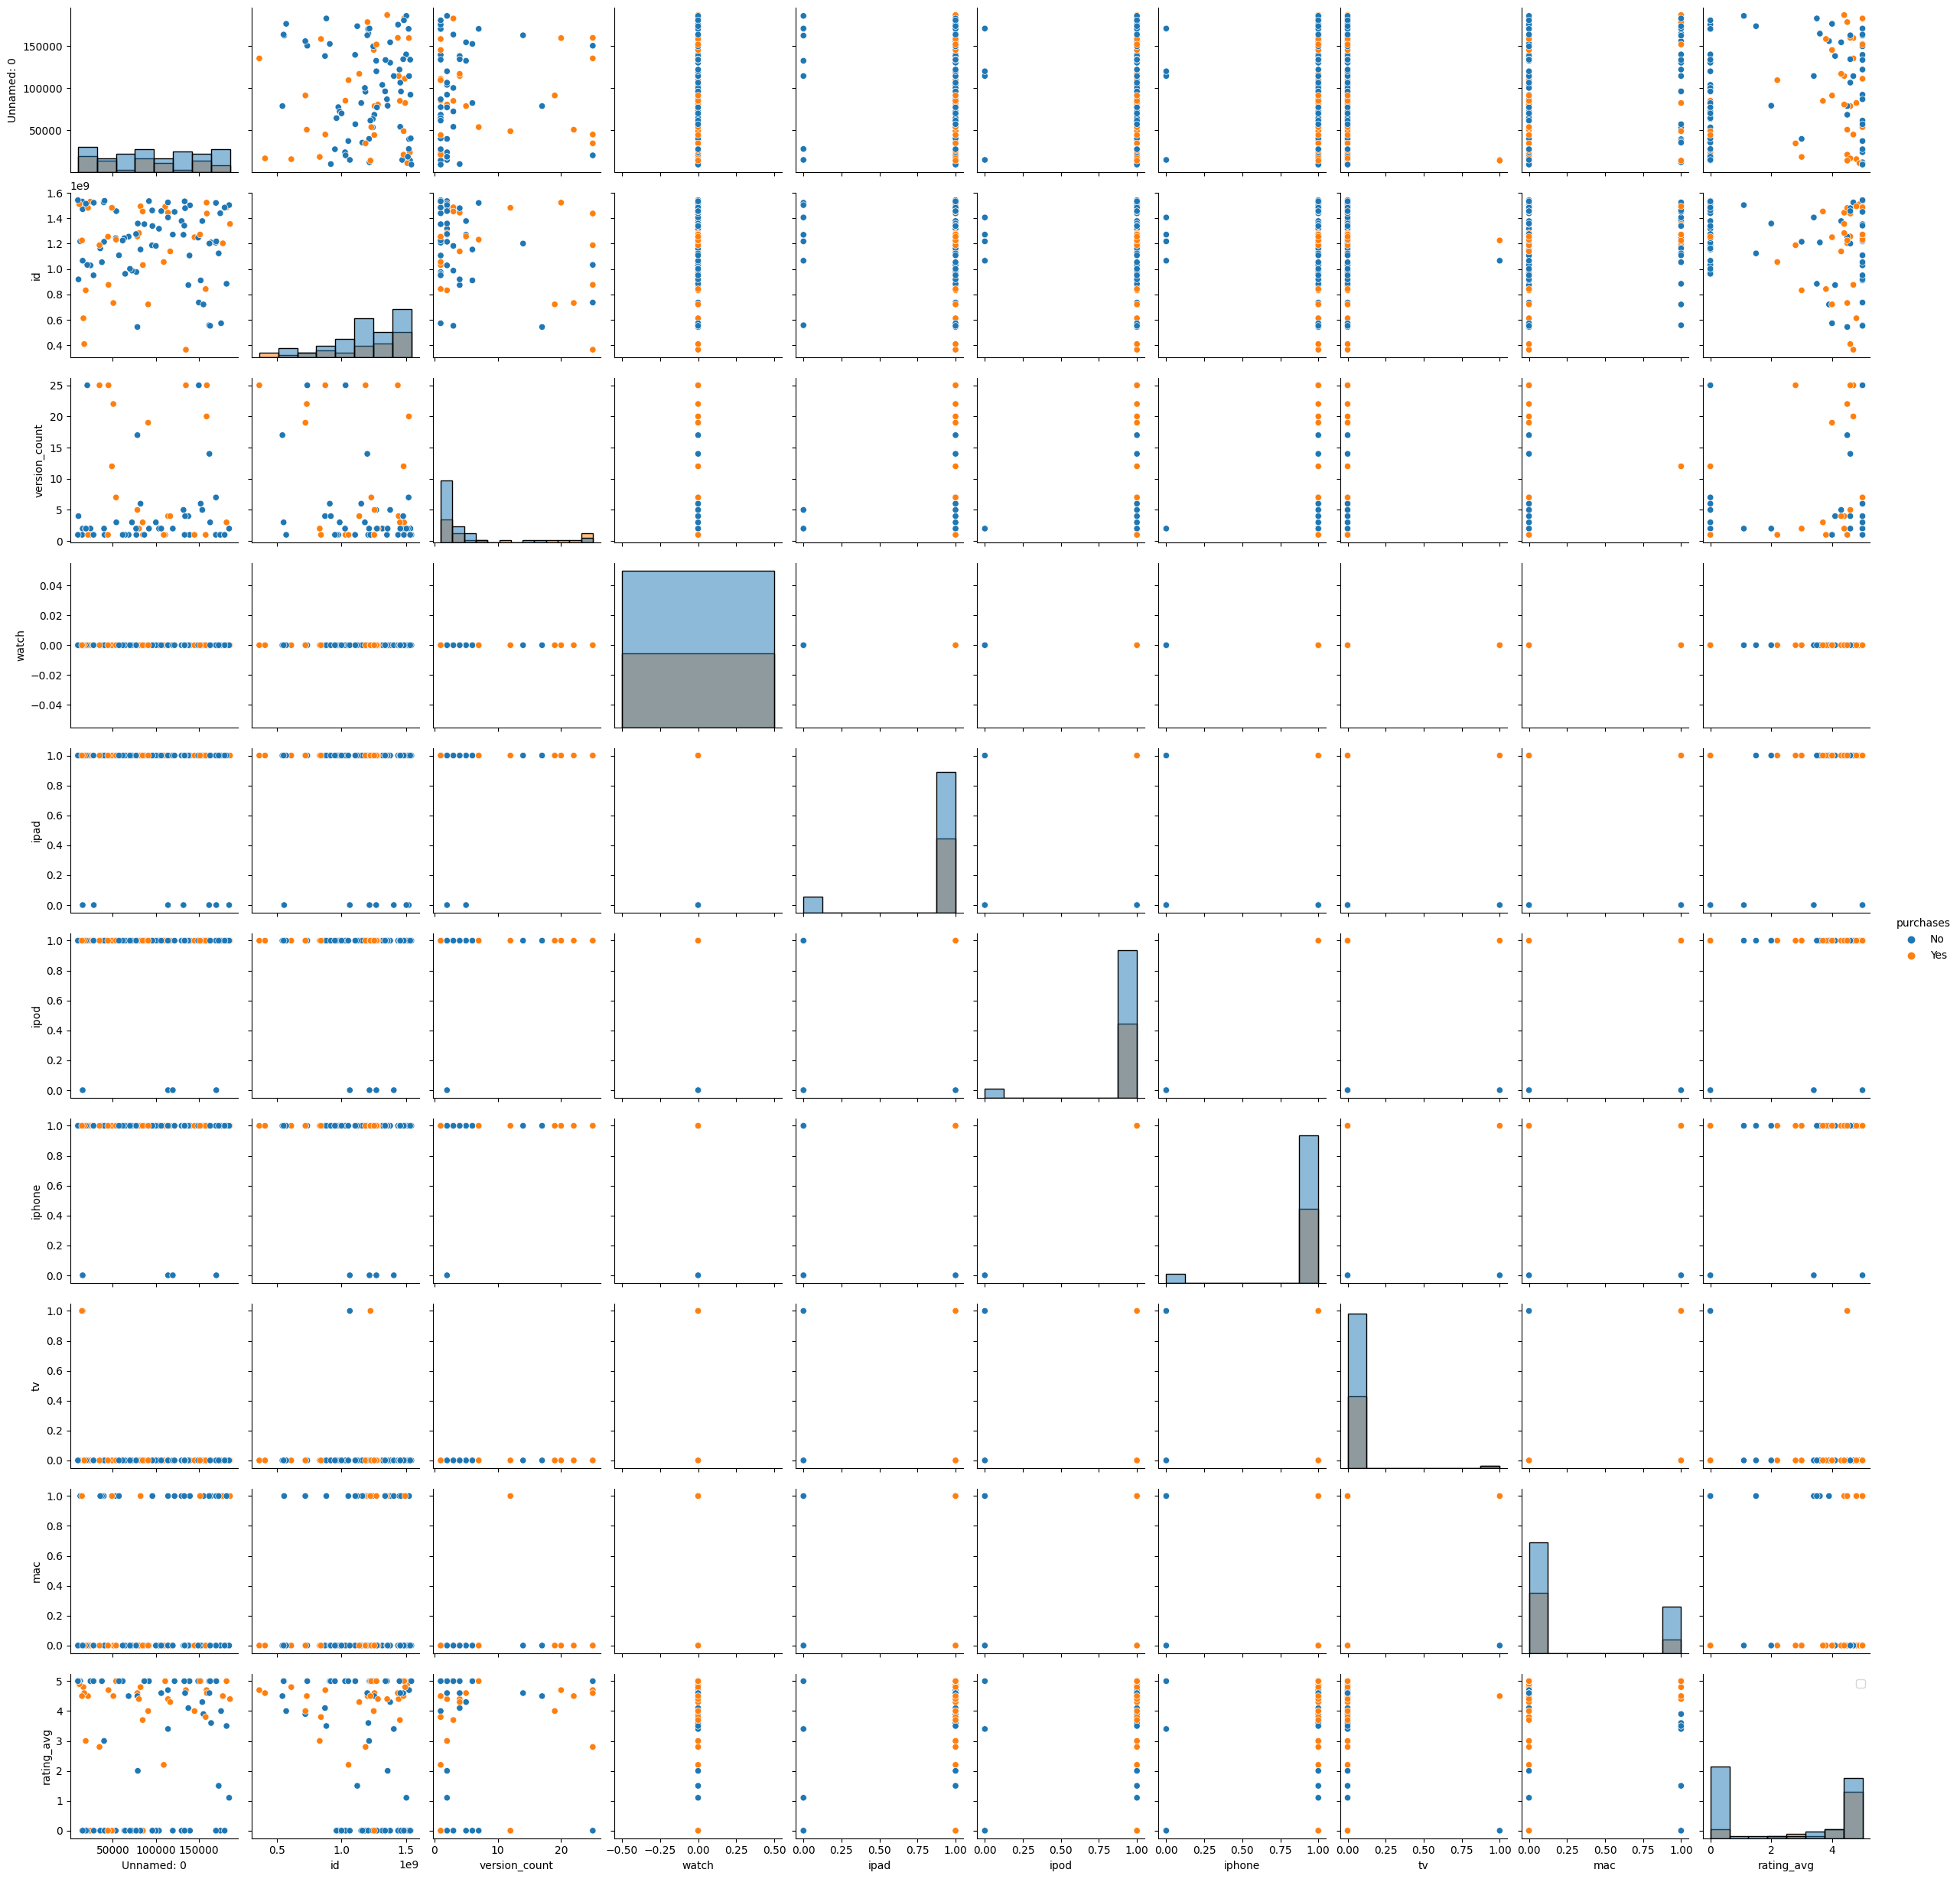

In [4]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=100, replace=False)
sns.pairplot(data_raw.iloc[random_subset], hue='purchases', diag_kind='hist')
plt.legend()

In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187907 entries, 0 to 187906
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         187907 non-null  int64  
 1   id                 187907 non-null  int64  
 2   name_app           187907 non-null  object 
 3   developer          187907 non-null  object 
 4   age_rating         187907 non-null  object 
 5   size               187905 non-null  object 
 6   price              187768 non-null  object 
 7   purchases          187731 non-null  object 
 8   languages          187087 non-null  object 
 9   category           187907 non-null  object 
 10  sub_category       129776 non-null  object 
 11  release_date       126886 non-null  object 
 12  last_version_date  126886 non-null  object 
 13  version_count      126886 non-null  float64
 14  watch              187907 non-null  int64  
 15  ipad               187907 non-null  int64  
 16  ip

In [6]:
data_raw.isna().sum()

Unnamed: 0               0
id                       0
name_app                 0
developer                0
age_rating               0
size                     2
price                  139
purchases              176
languages              820
category                 0
sub_category         58131
release_date         61021
last_version_date    61021
version_count        61021
watch                    0
ipad                     0
ipod                     0
iphone                   0
tv                       0
mac                      0
url                      0
icon_url                 0
rating_avg               0
rating_count             0
dtype: int64

In [7]:
data_raw.describe()

,Unnamed: 0,id,version_count,watch,ipad,ipod,iphone,tv,mac,rating_avg
count,187907.000000,1.879070e+05,126886.000000,187907.000000,187907.000000,187907.000000,187907.000000,187907.000000,187907.000000,187907.000000
mean,93953.000000,1.193945e+09,4.428054,0.002411,0.886737,0.960821,0.960922,0.010090,0.247654,2.666834
std,54244.222854,3.003843e+08,5.648048,0.049040,0.316915,0.194021,0.193781,0.099942,0.431651,2.075853
min,0.000000,2.817365e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46976.500000,1.029854e+09,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,93953.000000,1.230302e+09,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.500000
75%,140929.500000,1.462331e+09,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.600000
max,187906.000000,1.544829e+09,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


Выберем те признаки, которые наиболее вероятно пригодятся для классификации

In [8]:
columns = ["age_rating", "size", "price", "purchases", "sub_category", "rating_avg", "rating_count", "ipad", "iphone", "mac"]
data = data_raw.loc[:, columns]

In [9]:
data.isna().sum()

age_rating          0
size                2
price             139
purchases         176
sub_category    58131
rating_avg          0
rating_count        0
ipad                0
iphone              0
mac                 0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187907 entries, 0 to 187906
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   age_rating    187907 non-null  object 
 1   size          187905 non-null  object 
 2   price         187768 non-null  object 
 3   purchases     187731 non-null  object 
 4   sub_category  129776 non-null  object 
 5   rating_avg    187907 non-null  float64
 6   rating_count  187907 non-null  object 
 7   ipad          187907 non-null  int64  
 8   iphone        187907 non-null  int64  
 9   mac           187907 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 14.3+ MB


In [11]:
data

,age_rating,size,price,purchases,sub_category,rating_avg,rating_count,ipad,iphone,mac
0,4+,191.6 MB,Free,No,Games,5.0,1,1,1,0
1,4+,20 MB,$0.99,No,Action,0.0,0,0,1,0
2,4+,46.7 MB,Free,No,Puzzle,0.0,0,1,1,0
3,12+,188 MB,Free,Yes,Adventure,4.9,116,1,1,0
4,4+,7.6 MB,Free,No,Strategy,3.5,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...
187902,4+,75.2 MB,Free,No,Puzzle,0.0,0,1,1,0
187903,4+,253 MB,$0.99,Yes,Family,2.5,2,1,0,0
187904,4+,33.2 MB,Free,No,NaN,3.5,4,1,1,1
187905,4+,85.9 MB,Free,Yes,NaN,3.9,137,1,1,1


Прежде чем визуализировать, приведём данные к числовым типам или к категориям

In [12]:
data["age_rating"] = data["age_rating"].str[:-1]
data["age_rating"]

0          4
1          4
2          4
3         12
4          4
          ..
187902     4
187903     4
187904     4
187905     4
187906     4
Name: age_rating, Length: 187907, dtype: object

In [13]:
data["age_rating"] = data["age_rating"].astype(int)
data["age_rating"]

0          4
1          4
2          4
3         12
4          4
          ..
187902     4
187903     4
187904     4
187905     4
187906     4
Name: age_rating, Length: 187907, dtype: int32

In [14]:
data["size"]

0         191.6 MB
1            20 MB
2          46.7 MB
3           188 MB
4           7.6 MB
            ...   
187902     75.2 MB
187903      253 MB
187904     33.2 MB
187905     85.9 MB
187906     14.9 MB
Name: size, Length: 187907, dtype: object

In [15]:
data[data["size"].str[-2] == 'K']

,age_rating,size,price,purchases,sub_category,rating_avg,rating_count,ipad,iphone,mac
128,4,484.7 KB,Free,No,Games,0.0,0,1,1,1
154,4,658.4 KB,Free,No,NaN,0.0,0,0,1,1
632,4,632.8 KB,Free,No,Family,5.0,1,1,1,0
1745,4,911.4 KB,$0.99,No,NaN,2.0,2,0,1,1
2178,12,769 KB,$0.99,No,Games,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
185843,4,706.6 KB,Free,No,Sports,2.0,8,1,1,0
186679,4,865.3 KB,Free,No,Games,4.0,3,0,1,0
186959,4,573.4 KB,Free,No,Board,4.7,7,0,1,0
187186,4,651.3 KB,Free,No,NaN,0.0,0,0,1,1


In [16]:
data[data["size"].str[-2] == 'G']

,age_rating,size,price,purchases,sub_category,rating_avg,rating_count,ipad,iphone,mac
30,4,1.2 GB,Free,Yes,NaN,4.5,4,1,1,1
106,4,3.8 GB,Free,Yes,NaN,0.0,0,1,1,1
235,12,5.6 GB,$34.99,No,Action,4.0,6,0,0,1
342,9,1.3 GB,Free,Yes,Adventure,4.5,721,1,1,0
388,17,1.4 GB,$2.99,No,Adventure,3.6,23,1,1,0
...,...,...,...,...,...,...,...,...,...,...
187685,9,1.4 GB,Free,Yes,Adventure,4.6,230,1,1,0
187750,17,1.2 GB,$0.99,Yes,Action,4.8,5.6K,1,1,0
187798,17,1.2 GB,Free,Yes,Adventure,3.5,128,1,1,0
187801,12,2.5 GB,$14.99,No,Casual,0.0,0,0,0,0


Переводим значения "size" к мегабайтам, разделив значения, содержавшие **KB** на 2^10 и умножив значения, содержавшие **GB** на 2^10 

In [17]:
data['size'] = data['size'].replace({'KB': '/2**10', 'MB': '', 'GB': '*2**10'}, regex=True).map(pd.eval, na_action='ignore')
data['size']

0         191.6
1          20.0
2          46.7
3         188.0
4           7.6
          ...  
187902     75.2
187903    253.0
187904     33.2
187905     85.9
187906     14.9
Name: size, Length: 187907, dtype: float64

In [18]:
data.isna().sum()

age_rating          0
size                2
price             139
purchases         176
sub_category    58131
rating_avg          0
rating_count        0
ipad                0
iphone              0
mac                 0
dtype: int64

Переводим значения "price" к числовому типу, удалив знак $ и заменив "Free" на 0. Также, в этом столбце присутствует невалидный элемент: строка "Size". Заменим её на NaN.

In [19]:
data["price"].unique()

array(['Free', '$0.99', '$2.99', '$1.99', '$3.99', '$19.99', '$4.99',
       '$6.99', '$34.99', '$16.99', '$8.99', '$14.99', '$9.99', '$49.99',
       '$12.99', nan, '$17.99', '$5.99', '$7.99', '$18.99', '$11.99',
       '$39.99', '$13.99', 'Size', '$15.99', '$29.99', '$24.99', '$21.99',
       '$10.99', '$22.99', '$26.99', '$40.99', '$35.99', '$23.99',
       '$109.99', '$32.99', '$99.99', '$54.99', '$44.99', '$94.99',
       '$25.99', '$27.99', '$20.99', '$199.99', '$31.99', '$79.99',
       '$124.99', '$89.99', '$59.99', '$30.99', '$174.99', '$64.99'],
      dtype=object)

In [20]:
data["price"] = data["price"].replace('Free', '0')
data["price"] = data["price"].replace('Size', np.nan)
data["price"].unique()

array(['0', '$0.99', '$2.99', '$1.99', '$3.99', '$19.99', '$4.99',
       '$6.99', '$34.99', '$16.99', '$8.99', '$14.99', '$9.99', '$49.99',
       '$12.99', nan, '$17.99', '$5.99', '$7.99', '$18.99', '$11.99',
       '$39.99', '$13.99', '$15.99', '$29.99', '$24.99', '$21.99',
       '$10.99', '$22.99', '$26.99', '$40.99', '$35.99', '$23.99',
       '$109.99', '$32.99', '$99.99', '$54.99', '$44.99', '$94.99',
       '$25.99', '$27.99', '$20.99', '$199.99', '$31.99', '$79.99',
       '$124.99', '$89.99', '$59.99', '$30.99', '$174.99', '$64.99'],
      dtype=object)

In [21]:
data["price"] = data["price"].str.replace('$','', regex=True)
data["price"].unique()

array(['0', '0.99', '2.99', '1.99', '3.99', '19.99', '4.99', '6.99',
       '34.99', '16.99', '8.99', '14.99', '9.99', '49.99', '12.99', nan,
       '17.99', '5.99', '7.99', '18.99', '11.99', '39.99', '13.99',
       '15.99', '29.99', '24.99', '21.99', '10.99', '22.99', '26.99',
       '40.99', '35.99', '23.99', '109.99', '32.99', '99.99', '54.99',
       '44.99', '94.99', '25.99', '27.99', '20.99', '199.99', '31.99',
       '79.99', '124.99', '89.99', '59.99', '30.99', '174.99', '64.99'],
      dtype=object)

In [22]:
data["price"] = pd.to_numeric(data["price"])
data["price"].unique()

array([  0.  ,   0.99,   2.99,   1.99,   3.99,  19.99,   4.99,   6.99,
        34.99,  16.99,   8.99,  14.99,   9.99,  49.99,  12.99,    nan,
        17.99,   5.99,   7.99,  18.99,  11.99,  39.99,  13.99,  15.99,
        29.99,  24.99,  21.99,  10.99,  22.99,  26.99,  40.99,  35.99,
        23.99, 109.99,  32.99,  99.99,  54.99,  44.99,  94.99,  25.99,
        27.99,  20.99, 199.99,  31.99,  79.99, 124.99,  89.99,  59.99,
        30.99, 174.99,  64.99])

Заменим признак "purchases" на числовой, заменив 'Yes' на 1, а 'No' на 0

In [23]:
data["purchases"] = pd.factorize(data["purchases"])[0]
data["purchases"]

0         0
1         0
2         0
3         1
4         0
         ..
187902    0
187903    1
187904    0
187905    1
187906    0
Name: purchases, Length: 187907, dtype: int64

In [24]:
data.dtypes

age_rating        int32
size            float64
price           float64
purchases         int64
sub_category     object
rating_avg      float64
rating_count     object
ipad              int64
iphone            int64
mac               int64
dtype: object

In [25]:
data.isna().sum()

age_rating          0
size                2
price             148
purchases           0
sub_category    58131
rating_avg          0
rating_count        0
ipad                0
iphone              0
mac                 0
dtype: int64

Заменим тип значений в столбце "sub_category" на специальный тип, предназначенный для хранения категориальных значений

In [26]:
data["sub_category"] = data["sub_category"].astype('category')

In [27]:
data["sub_category"].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Board', 'Card', 'Casino', 'Casual',
                  'Dice', 'Educational', 'Family', 'Games', 'Music', 'Puzzle',
                  'Racing', 'Role Playing', 'Simulation', 'Sports', 'Strategy',
                  'Trivia', 'Word'],
, ordered=False)

Переводим значения "rating_count" к числу оценок, умножив значения, содержавшие **K** на 10^3, а зачения, содержащие **M**, на 10^6

In [28]:
data['rating_count'] = data['rating_count'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

In [29]:
data.isna().sum()

age_rating          0
size                2
price             148
purchases           0
sub_category    58131
rating_avg          0
rating_count        0
ipad                0
iphone              0
mac                 0
dtype: int64

In [30]:
data.dtypes

age_rating         int32
size             float64
price            float64
purchases          int64
sub_category    category
rating_avg       float64
rating_count       int32
ipad               int64
iphone             int64
mac                int64
dtype: object

Избавимся от выбросов. Для выбранного датасета признаки "size", "price" и "rating_count" содержат выбросы. Удалим из датасета строки, в которых зачения "size", "price" или "rating_count" выходят за пределы квантилей 0.005 и 0.995.

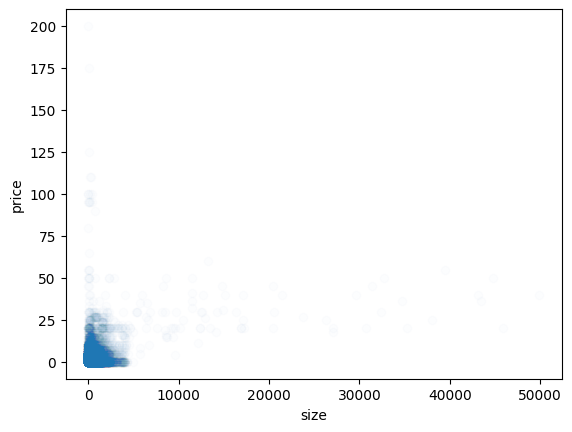

In [31]:
plt.scatter(data["size"], data["price"], alpha=0.01)
plt.xlabel("size")
plt.ylabel("price")
pass

In [32]:
data["size"].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005       1.70
0.010       3.20
0.050      10.10
0.100      15.50
0.500      79.70
0.900     265.46
0.950     386.50
0.990    1024.00
0.995    1536.00
Name: size, dtype: float64

In [33]:
data["price"].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.00
0.010    0.00
0.050    0.00
0.100    0.00
0.500    0.00
0.900    0.00
0.950    1.99
0.990    5.99
0.995    8.99
Name: price, dtype: float64

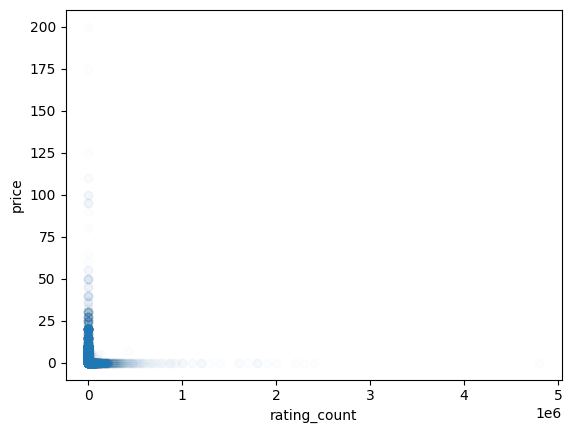

In [34]:
plt.scatter(data["rating_count"], data["price"], alpha=0.01)
plt.xlabel("rating_count")
plt.ylabel("price")
pass

In [35]:
data["rating_count"].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005        0.0
0.010        0.0
0.050        0.0
0.100        0.0
0.500        2.0
0.900      141.0
0.950      738.0
0.990    15594.0
0.995    40447.0
Name: rating_count, dtype: float64

In [36]:
rows_to_drop = data[
    (data["size"] < data["size"].quantile(0.005)) | (data["size"] > data["size"].quantile(0.995)) | 
    (data["price"]  < data["price"].quantile(0.005)) | (data["price"]  > data["price"].quantile(0.995)) |
    (data["rating_count"]  < data["rating_count"].quantile(0.005)) | (data["rating_count"]  > data["rating_count"].quantile(0.995))].index
data = data.drop(rows_to_drop)
data.shape

(184522, 10)

In [37]:
rows_to_drop

Int64Index([    89,    106,    111,    128,    154,    203,    235,    248,
               251,    305,
            ...
            187508, 187513, 187552, 187572, 187659, 187801, 187857, 187868,
            187882, 187898],
           dtype='int64', length=3385)

In [38]:
data.describe()

,age_rating,size,price,purchases,rating_avg,rating_count,ipad,iphone,mac
count,184522.000000,184520.000000,184402.000000,184522.000000,184522.000000,184522.000000,184522.000000,184522.000000,184522.000000
mean,5.964487,120.849991,0.205768,0.353979,2.654507,289.430962,0.890382,0.964259,0.246041
std,3.761549,150.498174,0.840315,0.480116,2.077286,2049.839584,0.312414,0.185644,0.430704
min,4.000000,1.700000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,32.600000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,4.000000,79.100000,0.000000,0.000000,3.500000,2.000000,1.000000,1.000000,0.000000
75%,4.000000,150.400000,0.000000,1.000000,4.600000,12.000000,1.000000,1.000000,0.000000
max,17.000000,1536.000000,8.990000,1.000000,5.000000,40400.000000,1.000000,1.000000,1.000000


In [39]:
data.describe(include=['category'])

,sub_category
count,127407
unique,19
top,Puzzle
freq,18861


Теперь мы готовы визуализировать данные

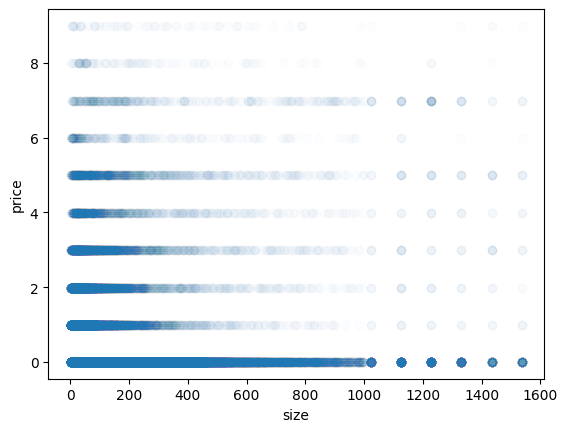

In [40]:
plt.scatter(data["size"], data["price"], alpha=0.01)
plt.xlabel("size")
plt.ylabel("price")
pass

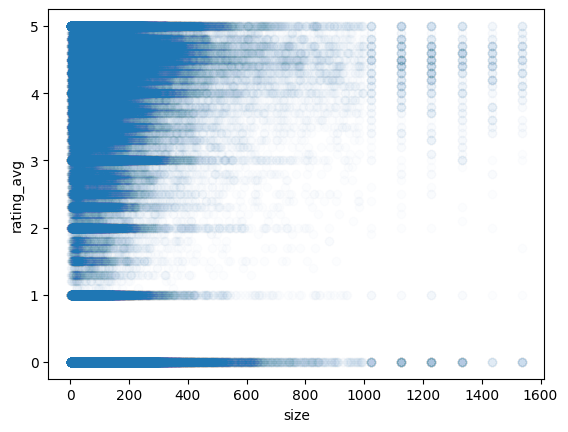

In [41]:
plt.scatter(data["size"], data["rating_avg"], alpha=0.01)
plt.xlabel("size")
plt.ylabel("rating_avg")
pass

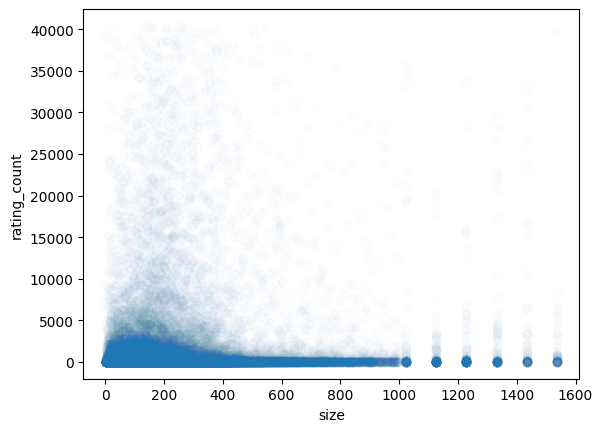

In [42]:
plt.scatter(data["size"], data["rating_count"], alpha=0.01)
plt.xlabel("size")
plt.ylabel("rating_count")
pass

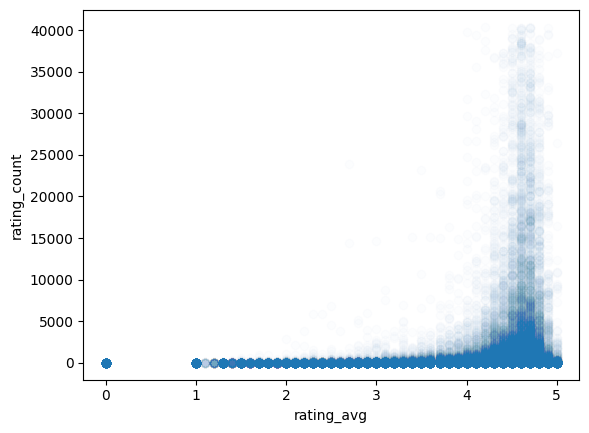

In [43]:
plt.scatter(data["rating_avg"], data["rating_count"], alpha=0.01)
plt.xlabel("rating_avg")
plt.ylabel("rating_count")
pass

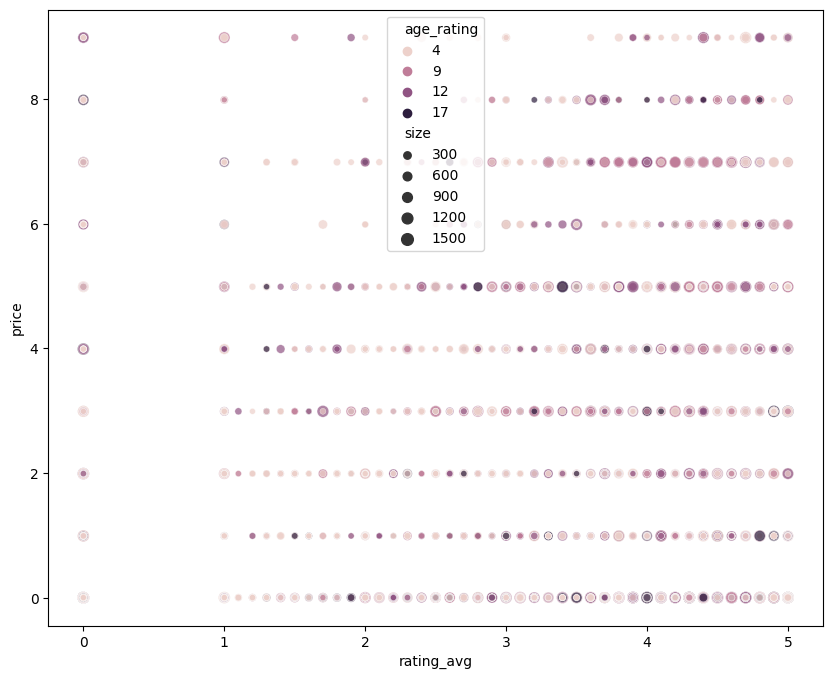

In [44]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x="rating_avg", y="price", size="size", hue="age_rating", data = data, alpha=0.7)
pass

In [45]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=100, replace=False)

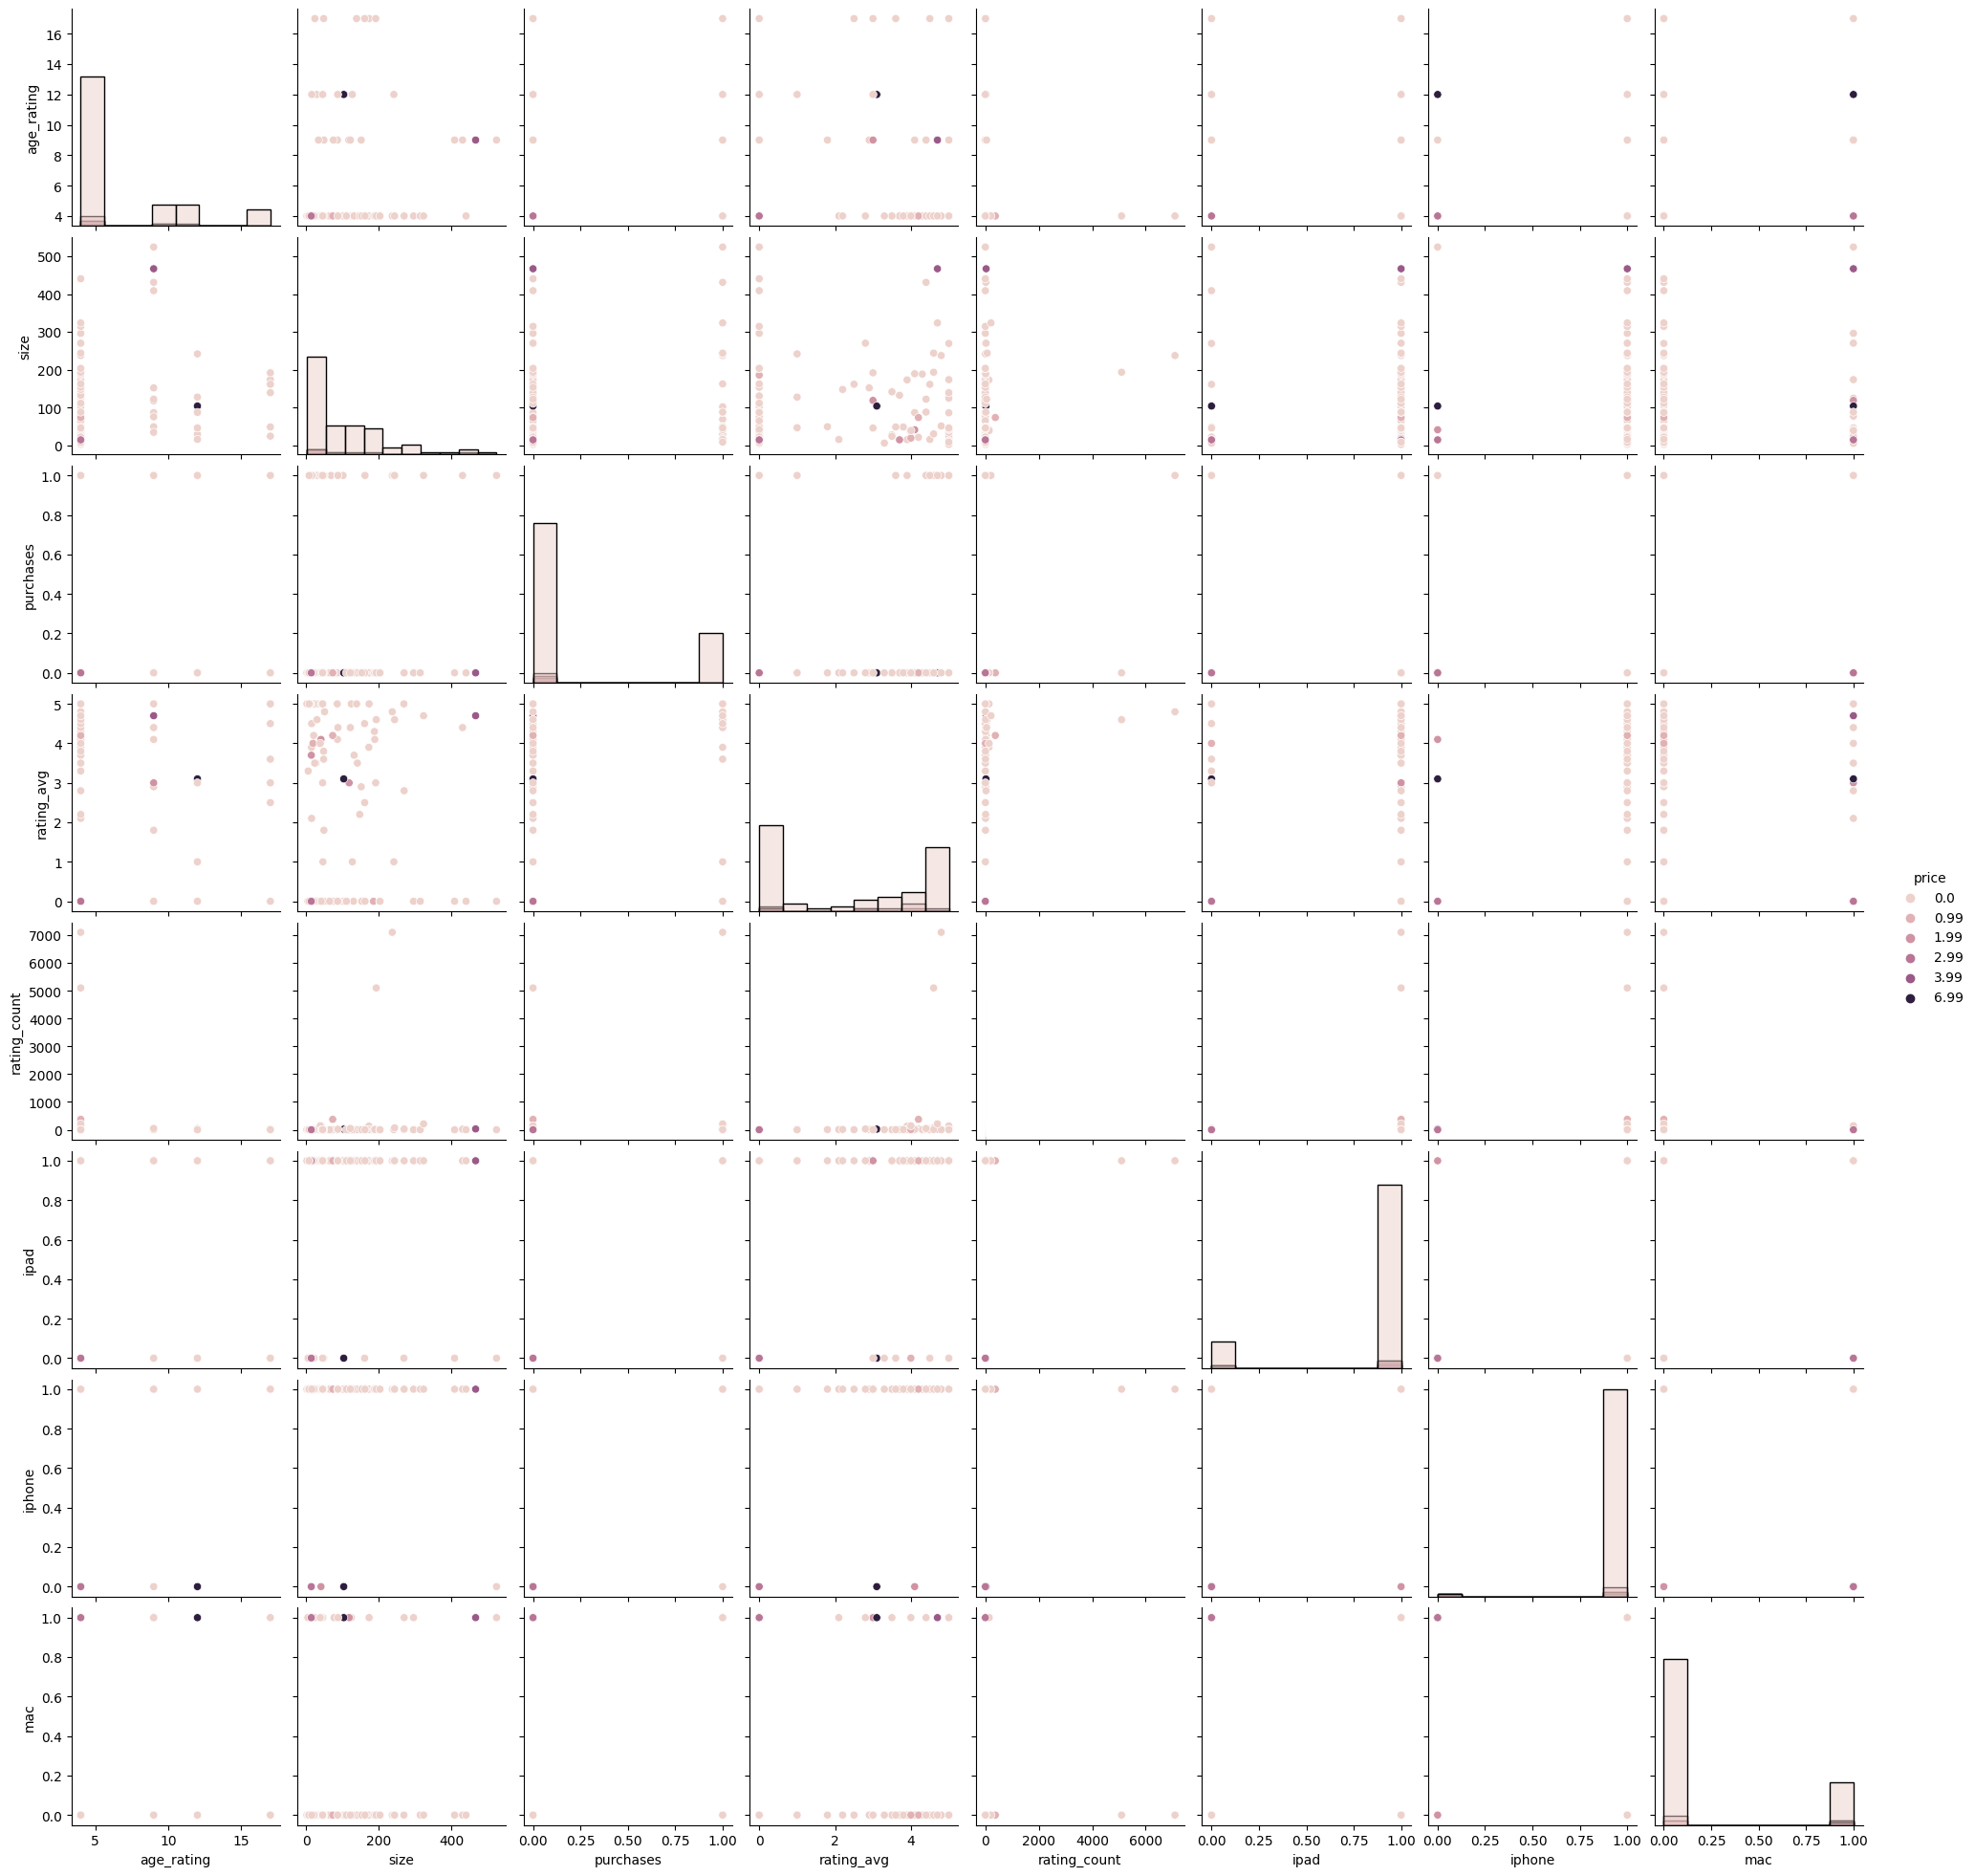

In [46]:
sns.pairplot(data.iloc[random_subset], hue="price", diag_kind="hist")

In [47]:
corr_mat = data.corr()
corr_mat

C:\Users\shabu\AppData\Local\Temp\ipykernel_30820\2083231324.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.corr()


,age_rating,size,price,purchases,rating_avg,rating_count,ipad,iphone,mac
age_rating,1.000000,0.189439,0.026780,0.080844,0.090888,0.072271,-0.001745,0.008465,-0.014637
size,0.189439,1.000000,0.124895,0.146375,0.119751,0.125380,0.058662,-0.009020,-0.025082
price,0.026780,0.124895,1.000000,-0.103709,0.018764,-0.015883,-0.103274,-0.263058,0.054919
purchases,0.080844,0.146375,-0.103709,1.000000,0.268144,0.134712,0.064202,0.020582,-0.014143
rating_avg,0.090888,0.119751,0.018764,0.268144,1.000000,0.128135,0.049179,0.026182,-0.012654
rating_count,0.072271,0.125380,-0.015883,0.134712,0.128135,1.000000,0.030832,0.020316,-0.018693
ipad,-0.001745,0.058662,-0.103274,0.064202,0.049179,0.030832,1.000000,0.272670,-0.073154
iphone,0.008465,-0.009020,-0.263058,0.020582,0.026182,0.020316,0.272670,1.000000,-0.137141
mac,-0.014637,-0.025082,0.054919,-0.014143,-0.012654,-0.018693,-0.073154,-0.137141,1.000000


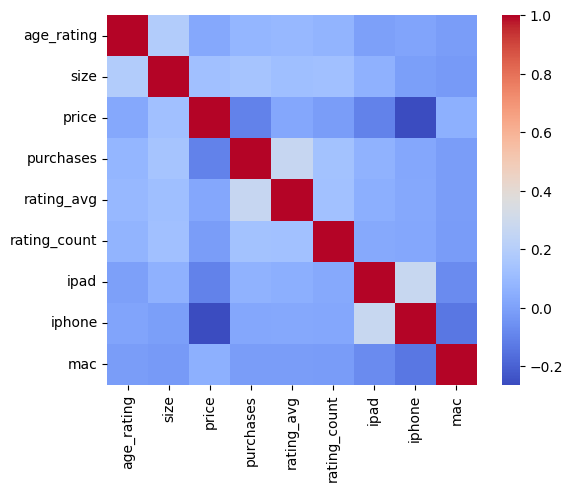

In [48]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Наиболее сильно кореллируют признаки доступности на iPad и iPhone, а также средняя оценка и наличие внутриигровых покупок, что очевидно.

Начнём обработку пропущеных значений

In [49]:
data.isna().sum()

age_rating          0
size                2
price             120
purchases           0
sub_category    57115
rating_avg          0
rating_count        0
ipad                0
iphone              0
mac                 0
dtype: int64

In [50]:
data.dtypes

age_rating         int32
size             float64
price            float64
purchases          int64
sub_category    category
rating_avg       float64
rating_count       int32
ipad               int64
iphone             int64
mac                int64
dtype: object

Для категориальных признаков, заполним пропущенные значения модой

In [51]:
data["sub_category"].fillna(data["sub_category"].mode().iloc[0], inplace=True)

In [52]:
data.isna().sum()

age_rating        0
size              2
price           120
purchases         0
sub_category      0
rating_avg        0
rating_count      0
ipad              0
iphone            0
mac               0
dtype: int64

Для числовых признаков, заполним пропущенные значения медианой

In [53]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)

C:\Users\shabu\AppData\Local\Temp\ipykernel_30820\269900637.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(axis = 0), axis=0 , inplace=True)


In [54]:
data.isna().sum()

age_rating      0
size            0
price           0
purchases       0
sub_category    0
rating_avg      0
rating_count    0
ipad            0
iphone          0
mac             0
dtype: int64

In [55]:
data.describe()

,age_rating,size,price,purchases,rating_avg,rating_count,ipad,iphone,mac
count,184522.000000,184522.000000,184522.000000,184522.000000,184522.000000,184522.000000,184522.000000,184522.000000,184522.000000
mean,5.964487,120.849538,0.205634,0.353979,2.654507,289.430962,0.890382,0.964259,0.246041
std,3.761549,150.497421,0.840058,0.480116,2.077286,2049.839584,0.312414,0.185644,0.430704
min,4.000000,1.700000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,32.600000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,4.000000,79.100000,0.000000,0.000000,3.500000,2.000000,1.000000,1.000000,0.000000
75%,4.000000,150.400000,0.000000,1.000000,4.600000,12.000000,1.000000,1.000000,0.000000
max,17.000000,1536.000000,8.990000,1.000000,5.000000,40400.000000,1.000000,1.000000,1.000000


In [56]:
data.describe(include=['category'])

,sub_category
count,184522
unique,19
top,Puzzle
freq,75976


Самый часто встречающийся жанр - паззлы

In [57]:
data.dtypes

age_rating         int32
size             float64
price            float64
purchases          int64
sub_category    category
rating_avg       float64
rating_count       int32
ipad               int64
iphone             int64
mac                int64
dtype: object

Произведём бинаризацию категориального признака "sub_category"

In [58]:
dummies = pd.get_dummies(data["sub_category"])

In [59]:
dummies.head()

,Action,Adventure,Board,Card,Casino,Casual,Dice,Educational,Family,Games,Music,Puzzle,Racing,Role Playing,Simulation,Sports,Strategy,Trivia,Word
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [60]:
data = pd.concat((data, dummies), axis=1)
data = data.drop(['sub_category'], axis=1)
data

,age_rating,size,price,purchases,rating_avg,rating_count,ipad,iphone,mac,Action,...,Games,Music,Puzzle,Racing,Role Playing,Simulation,Sports,Strategy,Trivia,Word
0,4,191.6,0.00,0,5.0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,4,20.0,0.99,0,0.0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4,46.7,0.00,0,0.0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,12,188.0,0.00,1,4.9,116,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,7.6,0.00,0,3.5,2,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187902,4,75.2,0.00,0,0.0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
187903,4,253.0,0.99,1,2.5,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
187904,4,33.2,0.00,0,3.5,4,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
187905,4,85.9,0.00,1,3.9,137,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0


Проведём нормализацию

In [61]:
data_norm = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

In [62]:
data_norm.describe()

,age_rating,size,price,purchases,rating_avg,rating_count,ipad,iphone,mac,Action,...,Games,Music,Puzzle,Racing,Role Playing,Simulation,Sports,Strategy,Trivia,Word
count,184522.000000,184522.000000,184522.000000,184522.000000,184522.000000,184522.000000,184522.000000,184522.000000,184522.000000,184522.000000,...,184522.000000,184522.000000,184522.000000,184522.000000,184522.000000,184522.000000,184522.000000,184522.000000,184522.000000,184522.000000
mean,0.151114,0.077657,0.022874,0.676990,0.530901,0.007164,0.890382,0.964259,0.246041,0.078820,...,0.087816,0.007208,0.411745,0.026913,0.019125,0.046601,0.020241,0.019580,0.021342,0.018930
std,0.289350,0.098089,0.093444,0.240058,0.415457,0.050739,0.312414,0.185644,0.430704,0.269458,...,0.283028,0.084593,0.492151,0.161829,0.136965,0.210784,0.140826,0.138553,0.144521,0.136278
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.020139,0.000000,0.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.050446,0.000000,0.500000,0.700000,0.000050,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.096917,0.000000,1.000000,0.920000,0.000297,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


В качестве целевого признака выберем "purchases".

In [63]:
X = data_norm.drop (["purchases"], axis=1) 
y = data["purchases"]

Поделим датасет на обучающую и тестовую выборки. Размер тестовой выборки - 25% от размера всего датасета

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(138391, 46131)

Проведем классификацию при поможи алгоритма k ближайших соседей **KNN**. По-умолчанию k = 5

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
print("Accuracy score: Train: {:.2f}%, Test: {:.2f}%".format(100 * accuracy_score(y_train, y_train_pred), 100 * accuracy_score(y_test, y_test_pred)))
print("MSE: Train: {}, Test: {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Accuracy score: Train: 78.20%, Test: 68.82%
MSE: Train: 0.21885093683837822, Test: 0.31317335414363445


k = 10

In [66]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
print("Accuracy score: Train: {:.2f}%, Test: {:.2f}%".format(100 * accuracy_score(y_train, y_train_pred), 100 * accuracy_score(y_test, y_test_pred)))
print("MSE: Train: {}, Test: {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Accuracy score: Train: 75.12%, Test: 70.59%
MSE: Train: 0.24974167395278596, Test: 0.29485595369708006


k = 15

In [67]:
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
print("Accuracy score: Train: {:.2f}%, Test: {:.2f}%".format(100 * accuracy_score(y_train, y_train_pred), 100 * accuracy_score(y_test, y_test_pred)))
print("MSE: Train: {}, Test: {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Accuracy score: Train: 74.37%, Test: 70.88%
MSE: Train: 0.2571482249568252, Test: 0.2922980208536559


Наибольшую точность на тестовой выборке 70.86% показал KNN алгоритм при k = 15.

Проведем классификацию при помощи алгоритма **Random forest**.

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
print("Accuracy score: Train: {:.2f}%, Test: {:.2f}%".format(100 * accuracy_score(y_train, y_train_pred), 100 * accuracy_score(y_test, y_test_pred)))
print("MSE: Train: {}, Test: {}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

Accuracy score: Train: 96.66%, Test: 68.28%
MSE: Train: 0.033535417765606146, Test: 0.31880947735795884


## Выводы
* С увеличением k, алгоритм **KNN** увеличивает свою точность.
* Алгоритм **Random forest** показывает себя гораздо лучше на обучающей выборке, чем **KNN**, однако, проигрывает по точности на тестовой выборке.